In [3]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [4]:
# Generate n iid ~ N(0,1)
def generate(n):
    return sp.stats.norm.rvs(size=n)

## 1.a
> Невідомі ні $a$, ні $\sigma^2$. Оцінюємо $a$. Розподіл відомий

Використаємо
$\sqrt {n-1} \displaystyle \frac{\hat a_n - a}{\hat \sigma_n} \sim \mathcal Student(n-1)$

$\displaystyle P\left(|\sqrt {n-1} \displaystyle \frac{\hat a_n - a}{\hat \sigma_n}| < z\right) = 1-\gamma$

$\displaystyle P\left(|a-\hat a| < \frac{z\hat\sigma}{\sqrt{n-1}}\right) = 1-\gamma$


TODO rewrite next block

In [7]:
# a) For UNknown variance and unknown mean
def task_1A(X, axes):
    print(f"task_1A (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=0)  # вибіркова дисперсія (1/n)
    sigma = np.sqrt(s2)
    n = X.shape[0]
    n_sqrt = np.sqrt(n-1)
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    # sp.stats.t.ppf(0.5) = 0
    z = sp.stats.t.ppf(1 -(gamma/2), df=n-1) # симетричний варіант
    
    a = mean - sigma * z / n_sqrt
    b = mean + sigma * z / n_sqrt
    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z = {z}; 1-(gamma/2)= {1 -(gamma/2)}")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 0 < b:
        print(f"> 0 is in the interval - OK")
    else:
        print(f"> 0 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])

    pdfx = np.linspace(-4,4,200)
    pdfy = sp.stats.norm.pdf(pdfx, mean, sigma)
    axes.plot(pdfx, pdfy, alpha=0.2)

    axes.fill_between(pdfx, pdfy, where=((pdfx >= a) & (pdfx <= b)), alpha=0.5, label='confidence interval')

    axes.axvline(mean)
    axes.text(mean, 0.1, 'mean', rotation=90)
    # axes.axvline(a)
    # axes.text(a, 0.1, 'z1', rotation=90)
    # axes.axvline(b)
    # axes.text(b, 0.1, 'z2', rotation=90)

    axes.set_title(f"task_1A. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    axes.legend(frameon=False)

    print()


task_1A (N= 100)
> Mean= 0.02747; D= 1.0652715890582154
> z = 2.6264054563851857; 1-(gamma/2)= 0.995
> Interval: (-0.24497 ; 0.29991); Size= 0.54488
> 0 is in the interval - OK

task_1A (N= 10000)
> Mean= 0.00695; D= 0.9912916022376513
> z = 2.5763210958565974; 1-(gamma/2)= 0.995
> Interval: (-0.01871 ; 0.03260); Size= 0.05130
> 0 is in the interval - OK

task_1A (N= 1000000)
> Mean= 0.00025; D= 0.9996033548560046
> z = 2.5758342201102504; 1-(gamma/2)= 0.995
> Interval: (-0.00233 ; 0.00283); Size= 0.00515
> 0 is in the interval - OK



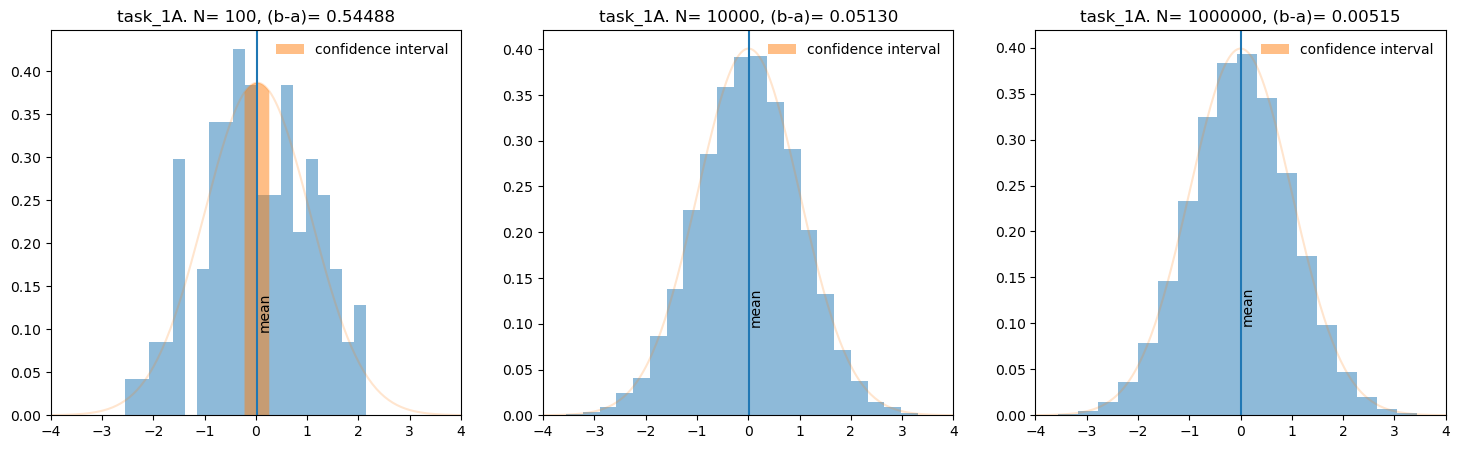

In [14]:
Xs = [generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,3)
for X,ax in zip(Xs, axs):
    task_1A(X, ax)
fig.set_size_inches((18,5))

## 1.b
> Невідомі ні $a$, ні $\sigma^2$, ні сам **розподіл**. Оцінити $a$

Використаємо
$\displaystyle \frac{\sum_i x_i - na}{\sqrt{n} \sigma} \longrightarrow \mathcal N(0, 1)$

$\displaystyle \sqrt{n} \frac{\overline x - a}{\sigma} \longrightarrow \mathcal N(0, 1)$

Але замість теор статистик візьмемо вибіркові
$a \to \hat a_n; \quad \sigma \to \hat \sigma_n$

Інтервал буде $\displaystyle \left(\hat a - \frac{z \hat \sigma}{\sqrt{n}}; \hat a + \frac{z \hat \sigma}{\sqrt n}\right)$
де $z = \Phi(1-\gamma/2)$

In [17]:
# b) unknown everything including distribution
def task_1B(X, axes):
    print(f"task_1B (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=1)  # вибіркова дисперсія (1/n-1)
    sigma = np.sqrt(s2)
    n_sqrt = np.sqrt(X.shape[0])
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    # sp.stats.norm.ppf(0.5) = 0
    z = sp.stats.norm.ppf(1 -(gamma/2)) # симетричний варіант
    
    a = mean - sigma * z / n_sqrt
    b = mean + sigma * z / n_sqrt
    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z = {z}; 1-(gamma/2)= {1 -(gamma/2)}")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 0 < b:
        print(f"> 0 is in the interval - OK")
    else:
        print(f"> 0 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])

    axes.axvline(mean)
    axes.text(mean, 0.1, 'mean', rotation=90)
    axes.axvline(a, lw=0.5)
    axes.text(a, 0.2, 'z1', rotation=90)
    axes.axvline(b, lw=0.5)
    axes.text(b, 0.3, 'z2', rotation=90)

    axes.set_title(f"task_1B. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    # axes.legend(frameon=False)

    print()


task_1B (N= 100)
> Mean= -0.13003; D= 1.109052429500064
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.40129 ; 0.14123); Size= 0.54253
> 0 is in the interval - OK

task_1B (N= 10000)
> Mean= 0.00714; D= 0.985909102891133
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.01844 ; 0.03271); Size= 0.05115
> 0 is in the interval - OK

task_1B (N= 1000000)
> Mean= 0.00003; D= 1.0031780950325186
> z = 2.5758293035489004; 1-(gamma/2)= 0.995
> Interval: (-0.00255 ; 0.00261); Size= 0.00516
> 0 is in the interval - OK



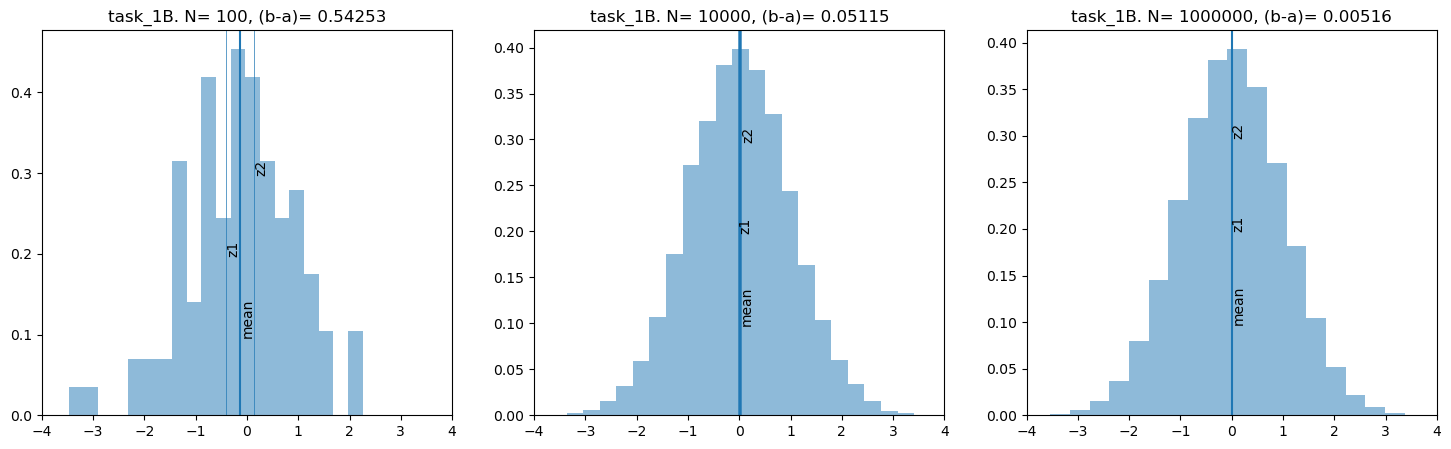

In [18]:
Xs = [generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,3)
for X,ax in zip(Xs, axs):
    task_1B(X, ax)
fig.set_size_inches((18,5))

## 1.c
> Невідомі $a$ та $\sigma^2$. Оцінити $\sigma^2$. Розподіл відомий

Використаємо
$\displaystyle \frac{n\hat\sigma^2}{\sigma^2} \sim \chi^2(n-1)$

Інтервал буде $\displaystyle \left(\frac{n \hat \sigma^2}{\beta}; \frac{n \hat \sigma^2}{\alpha}\right)$  
де $\alpha = F^{-1}_{\chi^2(n-1)}(\gamma/2)$, $\beta = F^{-1}_{\chi^2(n-1)}(1-\gamma/2)$

In [19]:
# c)
def task_1C(X, axes):
    print(f"task_1C (N= {X.shape[0]})")

    mean = X.mean()        # вибіркове середнє
    s2 = X.var(ddof=1)  # вибіркова дисперсія (1/n-1)
    sigma = np.sqrt(s2)
    n = X.shape[0]
    n_sqrt = np.sqrt(X.shape[0])
    gamma = 0.01

    # ppf(x) = F^{-1}(x)
    z1 = sp.stats.chi2.ppf(gamma/2, n-1)      # НЕсиметричний варіант 
    z2 = sp.stats.chi2.ppf(1 - gamma/2, n-1)
    
    a = n * s2 / z2
    b = n * s2 / z1

    print(f"> Mean= {mean:.5f}; D= {s2}")
    print(f"> z1= {z1}; z2= {z2};")
    print(f"> Interval: ({a:.5f} ; {b:.5f}); Size= {b-a:.5f}")

    if a < 1 < b:
        print(f"> 1 is in the interval - OK")
    else:
        print(f"> 1 is outside the interval - NOT OK")

    axes.hist(X, density=True, bins=(min(int(X.shape[0] / 5), 25)), histtype='stepfilled', alpha=0.5)
    axes.set_xlim([-4, 4])


    pdfx = np.linspace(-4,4,200)
    pdfy_s = sp.stats.norm.pdf(pdfx, mean, s2)
    pdfy_a = sp.stats.norm.pdf(pdfx, mean, a)
    pdfy_b = sp.stats.norm.pdf(pdfx, mean, b)
    axes.plot(pdfx, pdfy_a, alpha=1, label='$\sigma^2 = a$')
    axes.plot(pdfx, pdfy_b, alpha=1, label='$\sigma^2 = b$')
    axes.plot(pdfx, pdfy_s, alpha=1, label='$\sigma^2 = \hat\sigma^2$')

    # axes.axvline(mean)
    # axes.text(mean, 0.1, 'mean', rotation=90)
    # axes.axvline(a, lw=0.5)
    # axes.text(a, 0.2, 'z1', rotation=90)
    # axes.axvline(b, lw=0.5)
    # axes.text(b, 0.3, 'z2', rotation=90)

    axes.set_title(f"task_1C. N= {X.shape[0]}, (b-a)= {b-a:.5f}")
    axes.legend(frameon=False)

    print()


task_1C (N= 30)
> Mean= 0.13781; D= 0.6752826637789973
> z1= 13.12114888796041; z2= 52.335617785933614;
> Interval: (0.38709 ; 1.54396); Size= 1.15687
> 1 is in the interval - OK

task_1C (N= 100)
> Mean= -0.09989; D= 1.0684728447435279
> z1= 66.51010530173737; z2= 138.98678345093953;
> Interval: (0.76876 ; 1.60648); Size= 0.83772
> 1 is in the interval - OK

task_1C (N= 10000)
> Mean= -0.00219; D= 0.9977072784624937
> z1= 9638.498196541614; z2= 10367.014838397536;
> Interval: (0.96239 ; 1.03513); Size= 0.07274
> 1 is in the interval - OK

task_1C (N= 1000000)
> Mean= -0.00134; D= 0.9993970000552375
> z1= 996359.9857567691; z2= 1003645.5274370939;
> Interval: (0.99577 ; 1.00305); Size= 0.00728
> 1 is in the interval - OK



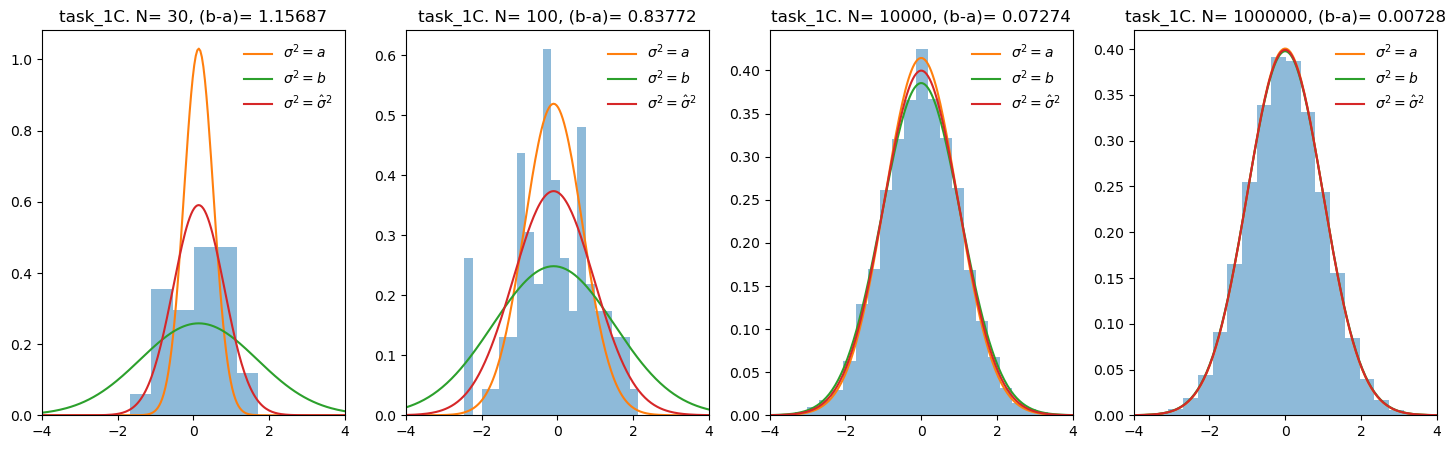

In [20]:
Xs = [generate(30), generate(100), generate(10_000), generate(1_000_000)]
fig, axs = plt.subplots(1,4)
for X,ax in zip(Xs, axs):
    task_1C(X, ax)
fig.set_size_inches((18,5))

z1 = 2.1797307472526497; z2 = 17.534546139484647


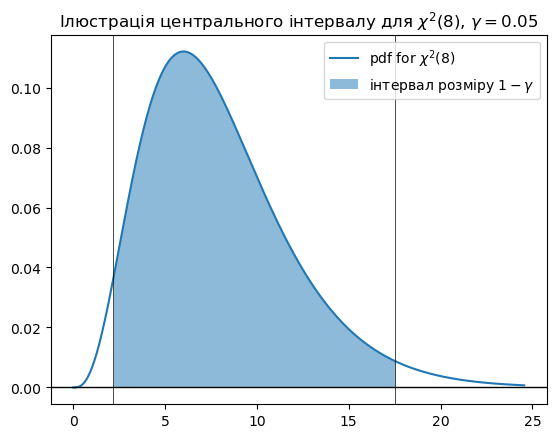

In [46]:
# Просто ілюстрація
gamma = 0.05
df = 8
z1 = sp.stats.chi2.ppf(gamma/2, df)      # НЕсиметричний варіант 
z2 = sp.stats.chi2.ppf(1 - gamma/2, df)

chix = np.linspace(0,z2 * 1.4,400)
chiy = sp.stats.chi2.pdf(chix, df)

plt.plot(chix, chiy, label=f'pdf for $\chi^2({df})$')
plt.fill_between(chix, chiy, where = (chix >= z1) & (chix <= z2+0.05), label=f'інтервал розміру $1-\gamma$', alpha=0.5)
plt.axvline(z1, c='k', lw=0.5)
plt.axvline(z2, c='k', lw=0.5)
plt.axhline(0, c='k', lw=1)
plt.legend()
plt.title(f'Ілюстрація центрального інтервалу для $\chi^2({df})$, $\gamma = {gamma}$')

print(f'z1 = {z1}; z2 = {z2}')